In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.models import load_model
import librosa
import numpy as np
import pandas as pd

##Read audio files and do feature extraction

In [ ]:
def readAudioFromDir(dir):
  mylist= os.listdir(dir)
  mylist.sort()
  bookmark = 0
  df = pd.DataFrame(columns=['feature'])
  for index,filename in enumerate(mylist):
      X, sample_rate = librosa.load(os.path.join(dir, filename), res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
      sample_rate = np.array(sample_rate)
      mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                          sr=sample_rate, 
                                          n_mfcc=13),
                      axis=0)
      feature = librosa.util.fix_length(mfccs, size=216)
      df.loc[bookmark] = [feature]
      bookmark=bookmark+1   
  return df   

In [ ]:
PATH = '/content/drive/MyDrive/ML/final/'
# mylist= os.listdir(PATH+'Vocal')
# mylist.sort()
# mylist

In [ ]:
# read from different folders
df = readAudioFromDir(PATH+'TaiwanTornado')
print(df['feature'][1].shape)

tmpdf = readAudioFromDir(PATH+'Vocal')
print(tmpdf['feature'][2].shape)

df = df.append(tmpdf,ignore_index=True)
df

(216,)
(216,)


,feature
0,"[-4.6290884, -2.8703024, -3.0102017, -3.953262..."
1,"[1.5525548, 0.57530427, -0.45949194, -0.788964..."
2,"[-7.5509515, -8.532493, -10.650301, -7.0786457..."
3,"[-10.949829, -8.08065, -7.0595875, -7.639188, ..."
4,"[-24.980347, -24.953886, -24.662334, -25.16099..."
...,...
495,"[-24.831331, -27.877941, -33.247665, -32.90612..."
496,"[-25.437338, -23.474709, -24.813301, -26.05268..."
497,"[-25.245573, -28.275743, -33.64312, -34.16642,..."
498,"[-38.33555, -42.956318, -46.409737, -46.767296..."


In [ ]:
# read labels based on how many folders are used
labels = pd.read_csv(PATH+'final_label.csv',names=['label'],header=None)
tmplabels = pd.read_csv(PATH+'final_label.csv',names=['label'],header=None)
labels = labels.append(tmplabels,ignore_index=True)

In [ ]:
labels

,label
0,3
1,2
2,4
3,2
4,4
...,...
495,1
496,1
497,1
498,1


In [ ]:
# bookmark = 0
# df = pd.DataFrame(columns=['feature'])
# for index,filename in enumerate(mylist):
#     X, sample_rate = librosa.load(os.path.join(PATH+'Vocal', filename), res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
#     sample_rate = np.array(sample_rate)
#     mfccs = np.mean(librosa.feature.mfcc(y=X, 
#                                         sr=sample_rate, 
#                                         n_mfcc=13),
#                     axis=0)
#     feature = mfccs
#     df.loc[bookmark] = [feature]
#     bookmark=bookmark+1        

In [ ]:
df['feature'][1].shape

(216,)

#Combining data with label

In [ ]:
df1 = pd.DataFrame(df['feature'].values.tolist())
newdf = pd.concat([df1,labels], axis=1)
newdf = newdf.fillna(0)
newdf
# rnewdf = newdf.rename(index=str, columns={"0": "label"})
# rnewdf=rnewdf.fillna(0)
# rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,-4.629088,-2.870302,-3.010202,-3.953263,-4.289808,-4.154637,-2.159364,-2.120933,-1.381256,0.257137,...,-0.826929,-1.588861,-0.215965,-0.417165,-0.675966,-1.920256,-2.857530,-4.772889,-4.366061,3
1,1.552555,0.575304,-0.459492,-0.788965,-0.064527,-0.667335,-2.869083,-1.648518,-1.112915,-2.534466,...,-1.833005,-0.570623,-0.117048,0.373097,-0.325958,-2.343718,-2.615494,-2.091474,-5.314033,2
2,-7.550951,-8.532493,-10.650301,-7.078646,-8.029507,-9.434490,-8.306224,-8.322134,-8.522637,-10.466767,...,-7.385895,-6.219456,-7.248411,-8.295213,-10.376951,-7.263439,-8.398682,-10.050838,-9.596871,4
3,-10.949829,-8.080650,-7.059587,-7.639188,-9.578123,-12.512422,-12.927950,-14.371367,-13.997959,-8.005836,...,-6.346621,-5.814651,-7.984504,-7.791381,-5.780437,-7.233220,-7.274304,-5.876518,-7.168071,2
4,-24.980347,-24.953886,-24.662334,-25.160990,-22.942522,-22.735220,-22.023518,-20.923206,-23.095581,-21.847494,...,-16.639158,-15.769260,-15.636785,-17.507130,-16.421642,-15.102693,-16.011000,-19.089247,-18.240360,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-24.831331,-27.877941,-33.247665,-32.906124,-28.613726,-27.124586,-27.913218,-27.246916,-27.423138,-27.862886,...,-40.203754,-40.203754,-40.214542,-40.203754,-40.205711,-40.201962,-40.110256,-40.011681,-40.051147,1
496,-25.437338,-23.474709,-24.813301,-26.052685,-29.380583,-34.306141,-40.409142,-41.901920,-41.577820,-41.391647,...,-45.782227,-44.236122,-40.245094,-36.282555,-36.384518,-37.659958,-35.945614,-29.325291,-26.432201,1
497,-25.245573,-28.275743,-33.643120,-34.166420,-32.970097,-31.993093,-33.321953,-33.504463,-34.419434,-35.179012,...,-29.149410,-28.663012,-29.172848,-30.870737,-32.966347,-33.011768,-33.446697,-29.081562,-25.918051,1
498,-38.335548,-42.956318,-46.409737,-46.767296,-46.933220,-46.982418,-47.003502,-46.930584,-46.853909,-46.940754,...,-43.018040,-43.174168,-43.971401,-43.767967,-43.799576,-43.899754,-42.878338,-42.733780,-43.990383,1


#Split data into training and validation

In [ ]:
newdf1 = np.random.rand(len(newdf)) < 0.8
train = newdf[newdf1]
valid = newdf[~newdf1]

train[0:20]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,-4.629088,-2.870302,-3.010202,-3.953263,-4.289808,-4.154637,-2.159364,-2.120933,-1.381256,0.257137,...,-0.826929,-1.588861,-0.215965,-0.417165,-0.675966,-1.920256,-2.857530,-4.772889,-4.366061,3
2,-7.550951,-8.532493,-10.650301,-7.078646,-8.029507,-9.434490,-8.306224,-8.322134,-8.522637,-10.466767,...,-7.385895,-6.219456,-7.248411,-8.295213,-10.376951,-7.263439,-8.398682,-10.050838,-9.596871,4
3,-10.949829,-8.080650,-7.059587,-7.639188,-9.578123,-12.512422,-12.927950,-14.371367,-13.997959,-8.005836,...,-6.346621,-5.814651,-7.984504,-7.791381,-5.780437,-7.233220,-7.274304,-5.876518,-7.168071,2
5,-24.098001,-20.238400,-14.084548,-13.423177,-12.122273,-9.851903,-6.000779,-9.311849,-16.144230,-16.221458,...,-26.056660,-23.980259,-25.787292,-24.288431,-23.652601,-22.083721,-22.701656,-24.006723,-23.056885,4
6,-5.460803,-8.239047,-9.746014,-9.297906,-9.766534,-9.653563,-10.315258,-10.208444,-9.479630,-10.357670,...,-7.894017,-6.381948,-8.523015,-9.675976,-8.490107,-8.183917,-7.029117,-7.189665,-5.583420,1
7,-1.910446,-2.344700,-2.931651,-3.254011,-4.101348,-3.890742,-4.117372,-4.641324,-5.550954,-4.865364,...,-8.842710,-9.619987,-8.582981,-8.949634,-10.242558,-10.256044,-7.961593,-9.157824,-9.004943,1
9,-0.429896,0.805841,2.607020,3.441412,1.743199,1.061002,-0.318256,-1.094922,-1.419135,-1.395249,...,2.665225,-0.707587,-0.263801,0.870196,1.799644,0.860197,0.862938,1.936414,-1.132842,3
10,-5.509171,-5.820221,-5.992949,-8.175426,-10.423654,-8.941258,-8.339604,-10.824386,-14.371819,-13.675599,...,-14.574802,-16.009626,-16.565466,-18.985157,-19.255377,-19.187122,-17.948599,-18.727776,-20.078074,4
11,-8.633757,-7.214110,-7.864945,-8.499032,-9.064795,-9.082582,-10.663468,-10.016463,-10.155837,-10.710485,...,-7.209064,-7.599411,-8.218596,-7.205268,-7.277114,-6.450670,-8.559706,-7.699699,-7.441223,4
12,-7.883301,-6.024765,-8.622354,-9.097473,-7.971232,-8.314653,-9.401707,-9.542953,-10.040552,-8.105124,...,-8.844249,-11.206508,-9.037516,-7.880168,-8.374961,-8.626075,-9.599726,-9.015850,-6.251379,2


In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_valid = valid.iloc[:,:-1]
y_valid = valid.iloc[:,-1]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

y_train = np_utils.to_categorical(LabelEncoder().fit_transform(y_train))
y_valid = np_utils.to_categorical(LabelEncoder().fit_transform(y_valid))
print(X_train.shape)
# print(y_train)
print(X_valid.shape)
# print(y_valid)
x_traincnn =np.expand_dims(X_train, axis=2)
x_validcnn= np.expand_dims(X_valid, axis=2)

(388, 216)
(112, 216)


##Another way to read in audios and put in lists (Just testing, not using it)

In [ ]:
audios = []
for index,filename in enumerate(mylist[0:5]):
    X, sample_rate = librosa.load(os.path.join(PATH+'TaiwanTornado', filename), res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    feature = mfccs
    audios.append(feature)     

In [ ]:
print(audios)
print(len(audios),len(audios[0]),len(audios[1]))

#Model

In [ ]:
base_model = load_model(PATH+'Emotion_Voice_Detection_Model.h5')

In [ ]:
from tensorflow.keras import activations
base_model.trainable = False
base_model.pop()
base_model.pop()
base_model.summary()

# base_model.add(layers.Dense(5))
# base_model.add(layers.Activation('softmax'))
# base_model.summary()
# model = base_model

inputs = keras.Input(shape=(216, 1))
x = base_model(inputs,training=False)
outputs = keras.layers.Dense(5,activation=activations.relu)(x)
model = keras.Model(inputs, outputs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 216, 128)          768       
                                                                 
 activation_8 (Activation)   (None, 216, 128)          0         
                                                                 
 conv1d_8 (Conv1D)           (None, 216, 128)          82048     
                                                                 
 activation_9 (Activation)   (None, 216, 128)          0         
                                                                 
 dropout_3 (Dropout)         (None, 216, 128)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 27, 128)          0         
 1D)                                                             
                                                        

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 216, 1)]          0         
                                                                 
 sequential (Sequential)     (None, 3456)              411008    
                                                                 
 dense_1 (Dense)             (None, 5)                 17285     
                                                                 
Total params: 428,293
Trainable params: 17,285
Non-trainable params: 411,008
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [ ]:
history=model.fit(x_traincnn, y_train, batch_size=16, epochs=50, validation_data=(x_validcnn, y_valid))

Epoch 1/50
25/25 [==============================] - 2s 40ms/step - loss: 7.0067 - accuracy: 0.2010 - val_loss: 6.3166 - val_accuracy: 0.2679
Epoch 2/50
25/25 [==============================] - 1s 31ms/step - loss: 6.8555 - accuracy: 0.2088 - val_loss: 6.3105 - val_accuracy: 0.2500
Epoch 3/50
25/25 [==============================] - 1s 30ms/step - loss: 6.8360 - accuracy: 0.2784 - val_loss: 6.3217 - val_accuracy: 0.2411
Epoch 4/50
25/25 [==============================] - 1s 30ms/step - loss: 6.8202 - accuracy: 0.2964 - val_loss: 6.5798 - val_accuracy: 0.2768
Epoch 5/50
25/25 [==============================] - 1s 30ms/step - loss: 6.8054 - accuracy: 0.2758 - val_loss: 6.7623 - val_accuracy: 0.2232
Epoch 6/50
25/25 [==============================] - 1s 30ms/step - loss: 6.8274 - accuracy: 0.3299 - val_loss: 6.4266 - val_accuracy: 0.2946
Epoch 7/50
25/25 [==============================] - 1s 31ms/step - loss: 6.9127 - accuracy: 0.2371 - val_loss: 6.3687 - val_accuracy: 0.2232
Epoch 8/50
25

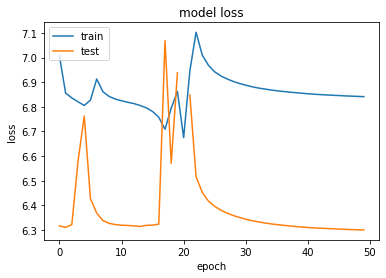

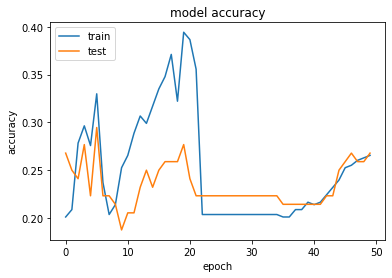

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(X_train[0])
model.predict(X_train[0])

#Fine Tuning

In [ ]:
base_model.trainable = True
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
# opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 216, 1)]          0         
                                                                 
 sequential (Sequential)     (None, 3456)              411008    
                                                                 
 dense_1 (Dense)             (None, 5)                 17285     
                                                                 
Total params: 428,293
Trainable params: 428,293
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

14

In [ ]:
fine_tune_epoch = 10
history=model.fit(x_traincnn, y_train, batch_size=16, epochs=fine_tune_epoch, validation_data=(x_validcnn, y_valid))

Epoch 1/50
25/25 [==============================] - 3s 89ms/step - loss: 6.8405 - accuracy: 0.2655 - val_loss: 6.3000 - val_accuracy: 0.2679
Epoch 2/50
25/25 [==============================] - 2s 79ms/step - loss: 6.8403 - accuracy: 0.2655 - val_loss: 6.2998 - val_accuracy: 0.2679
Epoch 3/50
25/25 [==============================] - 2s 79ms/step - loss: 6.8401 - accuracy: 0.2655 - val_loss: 6.2995 - val_accuracy: 0.2768
Epoch 4/50
25/25 [==============================] - 2s 78ms/step - loss: 6.8399 - accuracy: 0.2655 - val_loss: 6.2993 - val_accuracy: 0.2768
Epoch 5/50
25/25 [==============================] - 2s 80ms/step - loss: 6.8397 - accuracy: 0.2655 - val_loss: 6.2992 - val_accuracy: 0.2768
Epoch 6/50
25/25 [==============================] - 2s 78ms/step - loss: 6.8395 - accuracy: 0.2680 - val_loss: 6.2990 - val_accuracy: 0.2768
Epoch 7/50
25/25 [==============================] - 2s 78ms/step - loss: 6.8393 - accuracy: 0.2680 - val_loss: 6.2988 - val_accuracy: 0.2768
Epoch 8/50
25

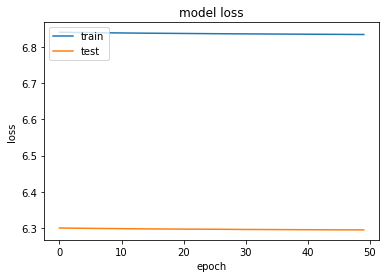

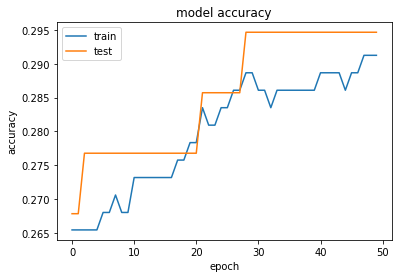

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Augment TESS to verify the original model

##Load Data & Label

In [ ]:
df = readAudioFromDir(PATH+'TESS/OAF_angry')
labels = np.array(['0']*len(df))
# print(label)
# print(len(df))

tmpdf = readAudioFromDir(PATH+'TESS/OAF_neutral')
df = df.append(tmpdf)
tmplabel = np.array(['1']*len(tmpdf))
labels = np.append(labels, tmplabel)
# print(len(labels))
# print(len(df))

tmpdf = readAudioFromDir(PATH+'TESS/OAF_Fear')
df = df.append(tmpdf)
tmplabel = np.array(['2']*len(tmpdf))
labels = np.append(labels, tmplabel)
# print(len(labels))
# print(len(df))

tmpdf = readAudioFromDir(PATH+'TESS/OAF_happy')
df = df.append(tmpdf)
tmplabel = np.array(['3']*len(tmpdf))
labels = np.append(labels, tmplabel)
# print(len(labels))
# print(len(df))

tmpdf = readAudioFromDir(PATH+'TESS/OAF_Sad')
df = df.append(tmpdf)
tmplabel = np.array(['4']*len(tmpdf))
labels = np.append(labels, tmplabel)
# print(len(df))

df
# print(len(labels))

,feature
0,"[-21.350485, -23.890097, -31.20002, -30.395668..."
1,"[-17.771654, -20.846895, -34.77229, -34.76848,..."
2,"[-18.426119, -23.114601, -34.23591, -33.16338,..."
3,"[-13.853846, -17.998827, -33.087337, -32.07781..."
4,"[-20.716389, -23.86245, -31.201902, -31.702396..."
...,...
195,"[-19.366125, -22.94464, -29.887356, -32.827038..."
196,"[-19.021433, -22.00388, -31.08967, -31.071913,..."
197,"[-14.820372, -18.226763, -30.68147, -30.906548..."
198,"[-20.212587, -23.02783, -32.815056, -33.804634..."


In [ ]:
labels = pd.DataFrame(labels, columns = ['labels'])
labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
995,4
996,4
997,4
998,4


In [ ]:
df1 = pd.DataFrame(df['feature'].values.tolist())
newdf = pd.concat([df1,labels], axis=1)
newdf = newdf.fillna(0)
newdf
# rnewdf = newdf.rename(index=str, columns={"0": "label"})
# rnewdf=rnewdf.fillna(0)
# rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,labels
0,-21.350485,-23.890097,-31.200020,-30.395668,-30.328817,-28.718212,-29.314699,-30.928617,-32.564152,-32.990982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-17.771654,-20.846895,-34.772289,-34.768478,-34.227818,-34.456402,-34.343159,-35.636787,-36.847691,-35.903549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-18.426119,-23.114601,-34.235909,-33.163380,-32.475624,-33.039963,-33.846123,-33.918644,-34.271400,-34.212231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-13.853846,-17.998827,-33.087337,-32.077816,-31.297337,-30.588057,-30.314537,-29.630033,-30.661264,-30.443096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-20.716389,-23.862450,-31.201902,-31.702396,-32.518303,-32.055103,-31.863251,-31.363461,-32.113789,-32.924973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-19.366125,-22.944639,-29.887356,-32.827038,-32.934677,-32.740700,-33.347382,-32.219231,-31.389692,-31.581808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
996,-19.021433,-22.003880,-31.089670,-31.071913,-31.580132,-31.585476,-33.083187,-33.513004,-32.927757,-31.905701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
997,-14.820372,-18.226763,-30.681471,-30.906548,-29.762648,-29.876051,-29.368296,-30.462862,-32.059788,-32.335171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
998,-20.212587,-23.027830,-32.815056,-33.804634,-34.368782,-37.136452,-36.220341,-35.041817,-32.917664,-32.036263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


##Splitting training and validation

In [ ]:
# newdf1 = np.random.rand(len(newdf))
# train = newdf[newdf1]
# valid = newdf[~newdf1]

# train[0:20]
X = np.array(newdf.iloc[:,:-1])
y = np.array(newdf.iloc[:,-1])

y = np_utils.to_categorical(LabelEncoder().fit_transform(y),num_classes=10)

X_cnn = np.expand_dims(X, axis=2)
# print(X_cnn)
print(y)
print(y[991])

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Load Model

In [ ]:
model = load_model(PATH+'Emotion_Voice_Detection_Model.h5')

In [ ]:
prediction = model.predict(X_cnn)
prediction = prediction.argmax(axis=1)


print(prediction[:10])
print(labels[:10])
# print(np.array(labels).flatten.astype(int))

32/32 [==============================] - 1s 39ms/step
[5 8 5 9 9 5 5 5 8 5]
  labels
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


In [ ]:

newLabel = np.array(labels).flatten().astype(int)
print(newLabel)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
pd.crosstab(newLabel,prediction,rownames=['label'],colnames=['predict'])

predict,0,5,6,7,8,9
label,,,,,,
0,1,115,1,2,22,59
1,6,36,0,45,22,91
2,0,90,3,10,16,81
3,2,67,0,48,9,74
4,1,27,1,34,52,85


In [ ]:
correct = 0
for i in range(len(prediction)):
  if(prediction[i] == newLabel[i] or prediction[i] == newLabel[i]+5): # disregard gender, so only check if the emotion is correct
    correct = correct + 1

accuracy = correct/len(prediction)
print(accuracy)

0.22
